In [246]:
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import statistics
from statistics import mode

In [247]:
df1 = pd.read_csv("C:/Users/leena/OneDrive/Documents/Leena/archive/4-wheeler-EV-cardekho.csv")

In [248]:
df1.head()

Review  Rating  \
0  Using it for the last 1 month. It's a gentle-l...     5.0   
1  In the beginning, the car performed excellentl...     1.0   
2  Hyundai is the best performing company beating...     5.0   
3  The car offers reasonable performance in this ...     5.0   
4  Hyundai Kona - First electric car of India was...     4.0   

                                Attributes Mentioned         Model  
0  ['mileage' 'performance' 'power' 'price' 'seat...  hyundai kona  
1        ['mileage' 'performance' 'service' 'parts']  hyundai kona  
2                          ['performance' 'service']  hyundai kona  
3                                    ['performance']  hyundai kona  
4  ['looks' 'comfort' 'interior' 'price' 'insuran...  hyundai kona

In [249]:
df1.shape

(140, 4)

In [250]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Review                140 non-null    object 
 1   Rating                140 non-null    float64
 2   Attributes Mentioned  140 non-null    object 
 3   Model                 140 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.5+ KB


In [251]:
df1.describe()

Rating
count  140.000000
mean     4.364286
std      0.992495
min      1.000000
25%      4.500000
50%      4.500000
75%      5.000000
max      5.000000

In [252]:
# Below code gives percentage of null in every column
null_percentage = df1.isnull().sum()/df1.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>60].keys()
df2=df1.drop(col_to_drop,axis=1)

In [253]:
df2.head()

Review  Rating  \
0  Using it for the last 1 month. It's a gentle-l...     5.0   
1  In the beginning, the car performed excellentl...     1.0   
2  Hyundai is the best performing company beating...     5.0   
3  The car offers reasonable performance in this ...     5.0   
4  Hyundai Kona - First electric car of India was...     4.0   

                                Attributes Mentioned         Model  
0  ['mileage' 'performance' 'power' 'price' 'seat...  hyundai kona  
1        ['mileage' 'performance' 'service' 'parts']  hyundai kona  
2                          ['performance' 'service']  hyundai kona  
3                                    ['performance']  hyundai kona  
4  ['looks' 'comfort' 'interior' 'price' 'insuran...  hyundai kona

In [254]:
#Dataset Details

In [255]:
df2['Review'] = df2['Review'].astype(str)

In [256]:
import re               # regular expression
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text)
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text
# Calling the cleaning function for reviewText column
df2["Review"] = df2["Review"].apply(cleaning)

# Checking Information
df2.head()

Review  Rating  \
0  using it for the last month it s a gentle-look...     5.0   
1  in the beginning the car performed excellently...     1.0   
2  hyundai is the best performing company beating...     5.0   
3  the car offers reasonable performance in this ...     5.0   
4  hyundai kona first electric car of india was r...     4.0   

                                Attributes Mentioned         Model  
0  ['mileage' 'performance' 'power' 'price' 'seat...  hyundai kona  
1        ['mileage' 'performance' 'service' 'parts']  hyundai kona  
2                          ['performance' 'service']  hyundai kona  
3                                    ['performance']  hyundai kona  
4  ['looks' 'comfort' 'interior' 'price' 'insuran...  hyundai kona

In [257]:
#Sentiment Analysis

In [258]:
# Assigning the Positive Negative and Neutral Sentiment ob the basis of overall column
a=[]
for x in df2['Rating']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neu'
    a.append(x)
  else:
    x='Neg'
    a.append(x)
df2['Sentiment']=a

In [259]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leena\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [260]:
res2 = {}
t = 0
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['Review']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/140 [00:00<?, ?it/s]

In [261]:
j = pd.DataFrame(res2).T
j

neg    neu    pos  compound
0    0.000  0.732  0.268    0.9477
1    0.085  0.799  0.115    0.2263
2    0.047  0.820  0.132    0.7506
3    0.000  0.855  0.145    0.7264
4    0.148  0.739  0.113   -0.5483
..     ...    ...    ...       ...
135  0.000  0.626  0.374    0.9611
136  0.000  0.554  0.446    0.9169
137  0.103  0.840  0.057   -0.5267
138  0.000  0.490  0.510    0.9626
139  0.151  0.594  0.254    0.2484

[140 rows x 4 columns]

In [262]:
df3 = pd.concat([df2, j], axis = 1)
df3

Review  Rating  \
0    using it for the last month it s a gentle-look...     5.0   
1    in the beginning the car performed excellently...     1.0   
2    hyundai is the best performing company beating...     5.0   
3    the car offers reasonable performance in this ...     5.0   
4    hyundai kona first electric car of india was r...     4.0   
..                                                 ...     ...   
135  it s one of the best evs of course after tesla...     4.5   
136  a stylish and comfortable ev with great featur...     4.5   
137  was using kia seltos automatic and nexon ev re...     4.5   
138  byd car really looking very nice outlook is fa...     4.5   
139  the range is very well more than expected all ...     4.5   

                                  Attributes Mentioned         Model  \
0    ['mileage' 'performance' 'power' 'price' 'seat...  hyundai kona   
1          ['mileage' 'performance' 'service' 'parts']  hyundai kona   
2                            ['performance' 'service']  hyundai kona   
3                                      ['performance']  hyundai kona   
4    ['looks' 'comfort' 'interior' 'price' 'insuran...  hyundai kona   
..                                                 ...           ...   
135                   ['mileage' 'comfort' 'steering']        BYD E6   
136                                ['looks' 'comfort']        BYD E6   
137  ['looks' 'comfort' 'space' 'automatic' 'experi...        BYD E6   
138                               ['looks' 'interior']        BYD E6   
139                          ['comfort' 'maintenance']        BYD E6   

    Sentiment    neg    neu    pos  compound  
0         Pos  0.000  0.732  0.268    0.9477  
1         Neg  0.085  0.799  0.115    0.2263  
2         Pos  0.047  0.820  0.132    0.7506  
3         Pos  0.000  0.855  0.145    0.7264  
4         Pos  0.148  0.739  0.113   -0.5483  
..        ...    ...    ...    ...       ...  
135       Pos  0.000  0.626  0.374    0.9611  
136       Pos  0.000  0.554  0.446    0.9169  
137       Pos  0.103  0.840  0.057   -0.5267  
138       Pos  0.000  0.490  0.510    0.9626  
139       Pos  0.151  0.594  0.254    0.2484  

[140 rows x 9 columns]

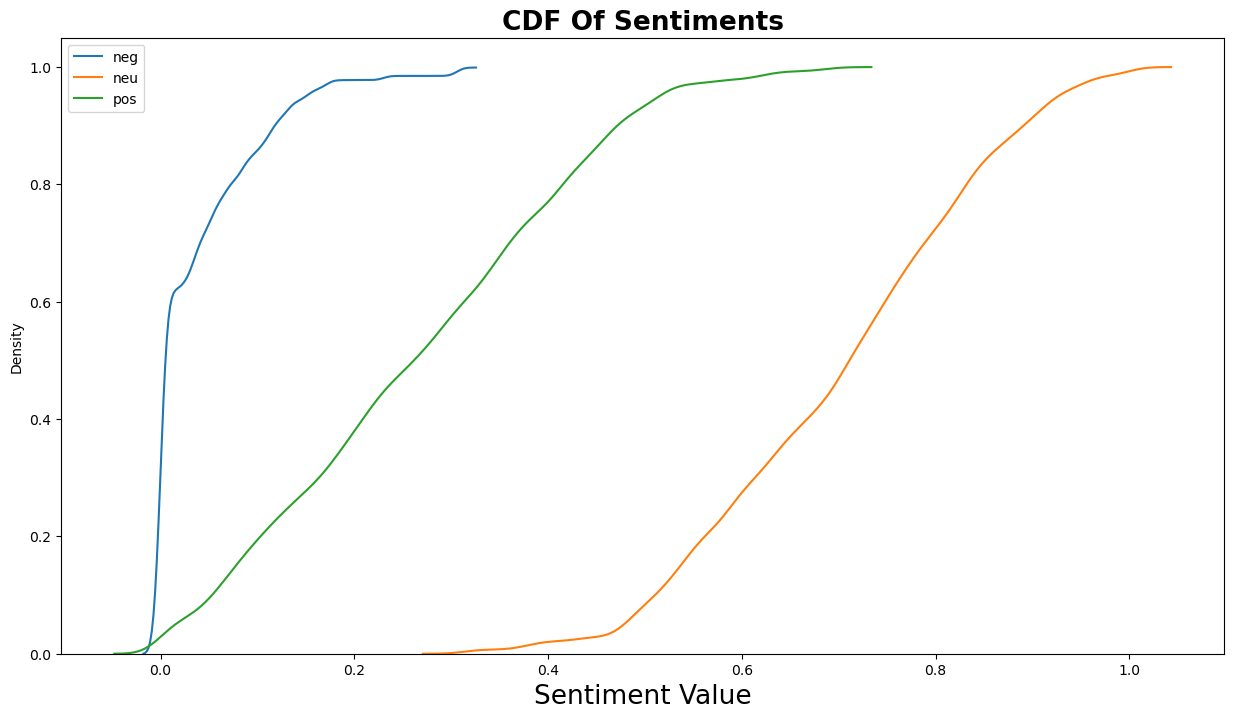

Wall time: 245 ms


In [263]:
%%time
plt.figure(figsize = (15, 8))
plt.title('CDF Of Sentiments',fontsize=19,fontweight='bold')
sns.kdeplot(df3['neg'],bw=0.1,cumulative=True)
sns.kdeplot(df3['neu'],bw=0.1,cumulative=True)
sns.kdeplot(df3['pos'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend(['neg', 'neu', 'pos'])
plt.show()

In [264]:
#Comments

In [265]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leena\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [266]:
stop_words = stopwords.words("english")

In [267]:
# applying stopword function on reviewText
df3['Review'] = df3['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [268]:
# For WordCloud

stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df3['Review']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [269]:
df3.columns

Index(['Review', 'Rating', 'Attributes Mentioned', 'Model', 'Sentiment', 'neg',
       'neu', 'pos', 'compound'],
      dtype='object')

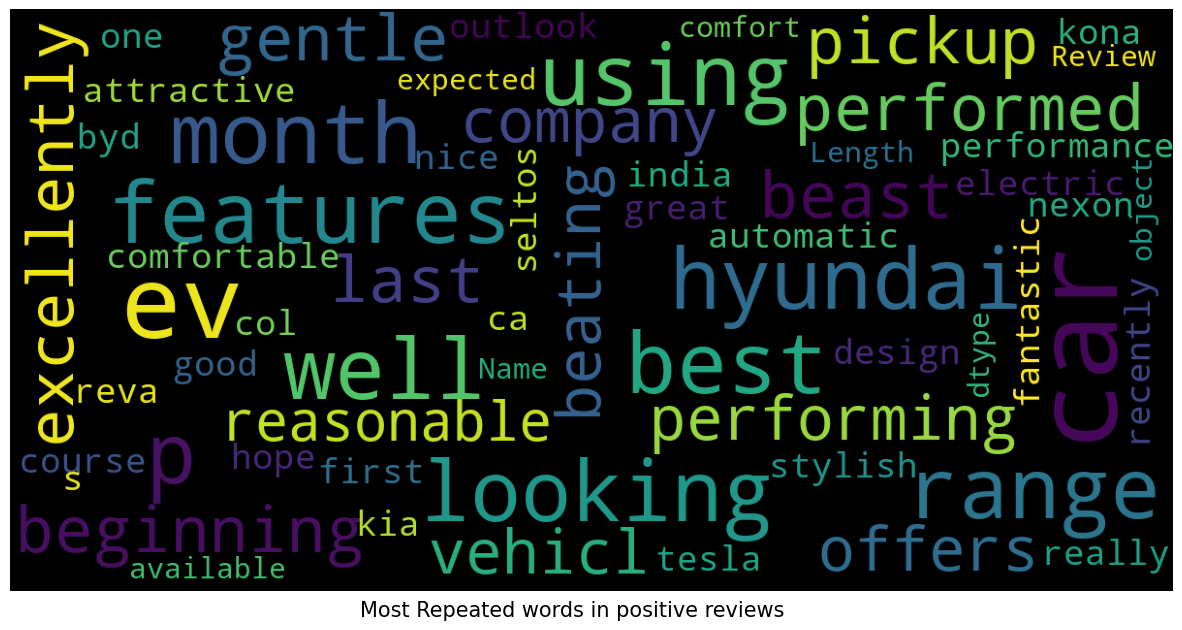

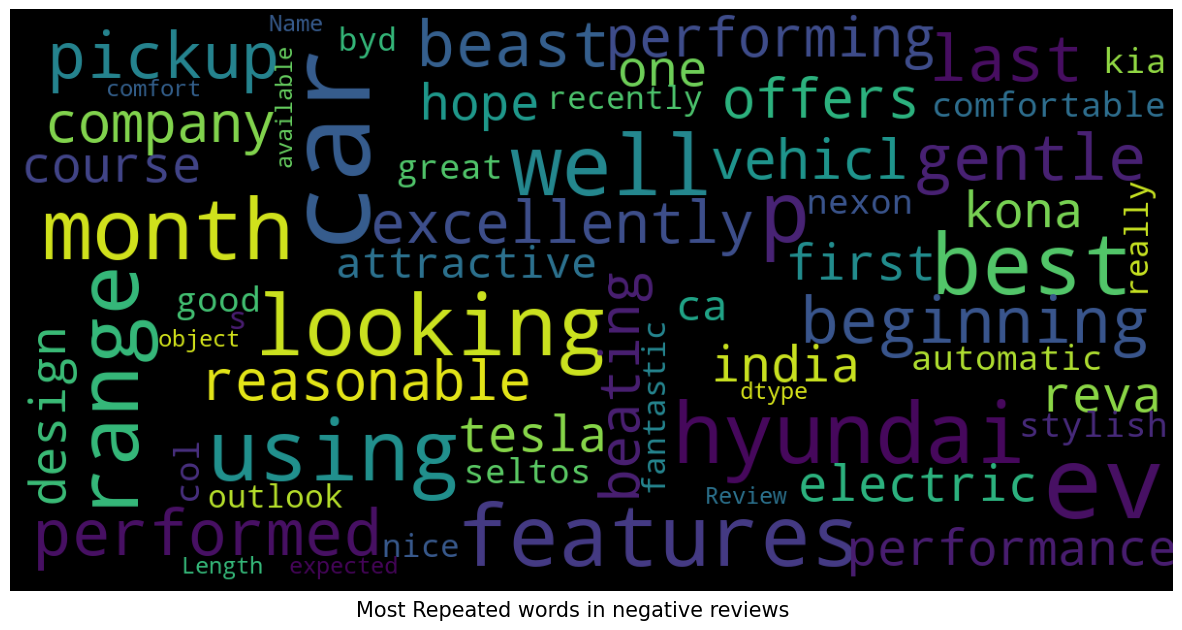

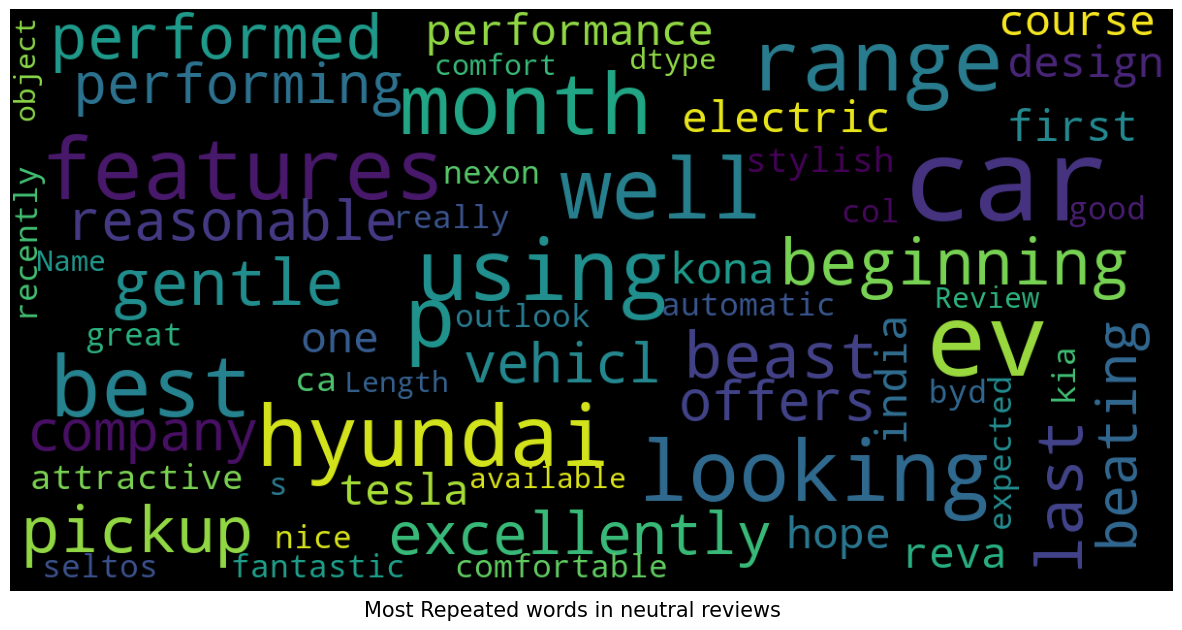

In [270]:
neg=df3[df3["Sentiment"] == "Neg"]["Review"]
pos=df3[df3["Sentiment"] == "Pos"]["Review"]
neu=df3[df3["Sentiment"] == "Neu"]["Review"]

word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")


In [271]:
# Getting BIGRAM
def get_top_n_bigram(corpus, n):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    
    # converting a text documents to a matrix of token counts.      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

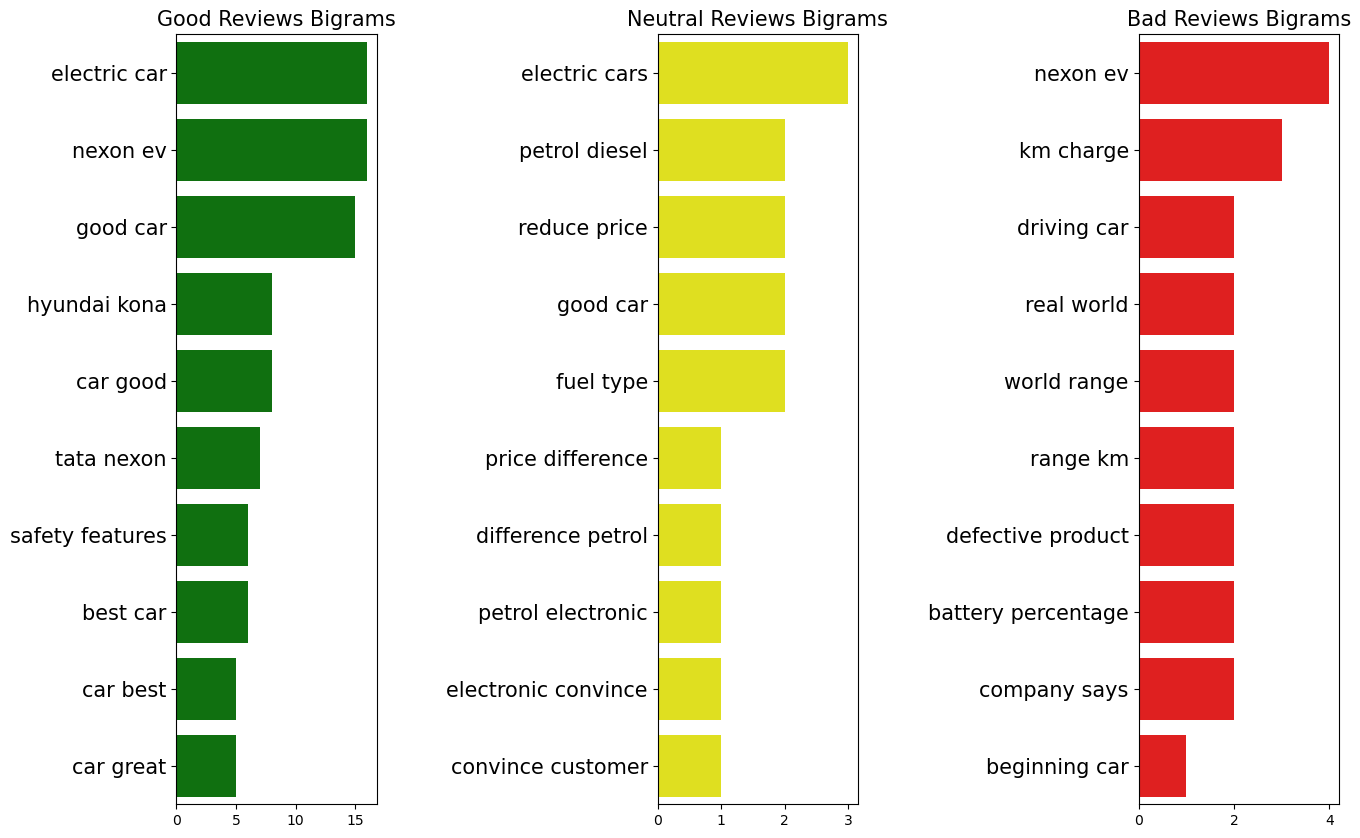

In [273]:
# create a function for bigram plots
def n_gram_plot(data,title,color):                            # Creating n_gram_plot function
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 10)                  # Calling get_top_n_bigram for pos columns
#common_words_neutral = get_top_n_bigram(neu, 10)               # Calling get_top_n_bigram for neu columns
common_words_bad = get_top_n_bigram(neg, 10)                   # Calling get_top_n_bigram for neg columns

# bigram plot using function above
plt.figure(figsize=(15,10))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')                  # Calling n_gram_plot for pos 
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')           # Calling n_gram_plot for pos
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')                      # Calling n_gram_plot for pos
plt.show()




In [ ]:
df4=df1.drop(['Review','Attributes Mentioned'],axis=1)

In [ ]:
df4.head

In [ ]:
df4.fillna(0)

In [ ]:
grouped_df = df4.groupby('Model')

In [ ]:
grouped_df1 = grouped_df.mean()
a = round(grouped_df1.fillna(0))

In [ ]:

dict_columns_type = {'Rating': float
               }
dfobj = a.astype(dict_columns_type)
dfobj.info()

In [ ]:
plt.figure(figsize = (15, 8))
a.plot.barh()
plt.xticks(rotation=90)

In [ ]:
from scipy import stats
grouped_df2= grouped_df.agg(lambda x: list(stats.mode(x)[0]))
grouped_df2